# Developer salary prediction 

In [24]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# importing the dataset
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [26]:
# geting the required columns
df = df[["Country", "Age", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename(columns={"ConvertedComp" : "Salary"})
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,Salary
0,Germany,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,31.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   Age           45446 non-null  float64
 2   EdLevel       57431 non-null  object 
 3   YearsCodePro  46349 non-null  object 
 4   Employment    63854 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.0+ MB


The salaries columns has null values (Missing observations. I will first remove the rows with missing values in salaries columns

In [28]:
df = df[df["Salary"].notnull()]
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,Salary
7,United States,36.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,22.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,23.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,49.0,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,53.0,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


Next is to drop the rows with missing data in the datafram

In [29]:
df = df.dropna()
df.isnull().sum()

Country         0
Age             0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

There are no columns with missing values now.<br>. Next is to drop use only the full time employment data as this will be useful in calculating the salary.

In [30]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.head()

,Country,Age,EdLevel,YearsCodePro,Salary
7,United States,36.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,22.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,23.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,49.0,Some college/university study without earning ...,7,14268.0
12,Netherlands,53.0,"Secondary school (e.g. American high school, G...",20,38916.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26487 entries, 7 to 64152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26487 non-null  object 
 1   Age           26487 non-null  float64
 2   EdLevel       26487 non-null  object 
 3   YearsCodePro  26487 non-null  object 
 4   Salary        26487 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


Next is to clean the countries column

In [32]:
df["Country"].value_counts()

United States     6724
United Kingdom    2066
India             1985
Germany           1723
Canada            1039
                  ... 
Bahamas              1
Guinea               1
Benin                1
Namibia              1
Yemen                1
Name: Country, Length: 148, dtype: int64

There are 148 countries, these need to be reduced to a few countries with a reasonable amount of data, like lets say 400 and above

In [33]:
def shorten_categories(categories, cutoff):
    categories_map = {}
    for i in range(len(categories)):
        if categories[i] >= cutoff:
            categories_map[categories.index[i]] = categories.index[i]
        else:
            categories_map[categories.index[i]] = "Other"
        
    return categories_map

In [34]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Other                 7457
United States         6724
United Kingdom        2066
India                 1985
Germany               1723
Canada                1039
France                 889
Brazil                 885
Spain                  606
Netherlands            592
Australia              582
Poland                 512
Italy                  502
Russian Federation     470
Sweden                 455
Name: Country, dtype: int64

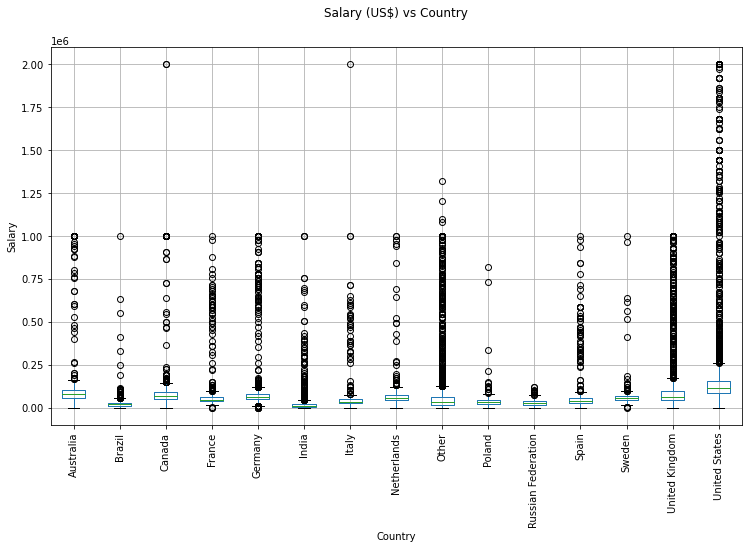

In [35]:
# Plots
fig, axis = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot("Salary", "Country", ax=axis)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

From the boxplots, there are many outliers. We aim at reducing the number of outliers to increase accuracy of model

In [36]:
#removing the outliers
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] > 10000]

#dropping the "Other" category/ country
df = df[df["Country"] != "Other"]

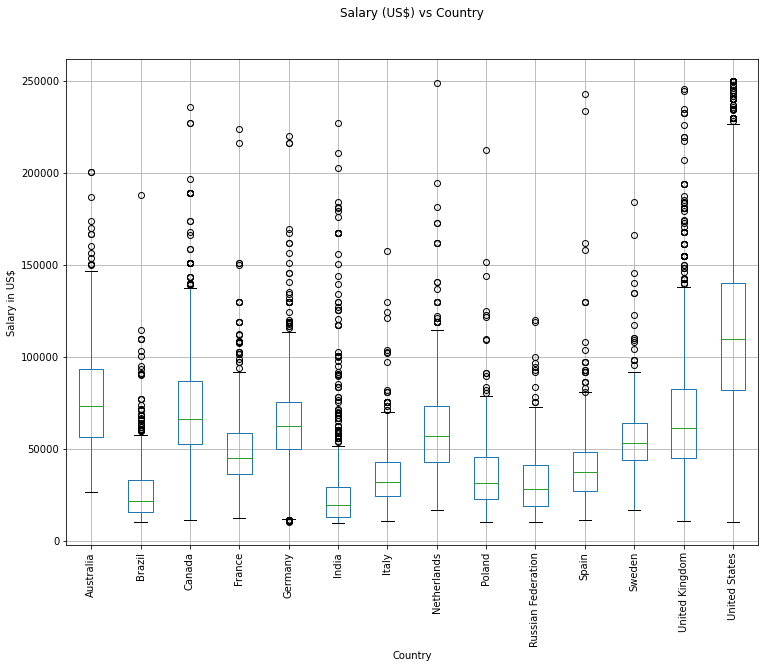

In [37]:
# Plotting the boxplot
fig, axis = plt.subplots(1, 1, figsize = (12, 9))
df.boxplot("Salary", "Country", ax=axis)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary in US$")
plt.xticks(rotation=90)
plt.show()

Next is to clean in the years code pro column

In [38]:
df.YearsCodePro.unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '6', '28', '8',
       '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21', '16',
       '18', '14', '32', '19', '22', '38', '30', '26', '27', '24', '17',
       '34', '35', '33', '36', '40', 'More than 50 years', '31', '37',
       '41', '45', '39', '42', '29', '43', '44', '50', '49'], dtype=object)

The column has non numeric values, so these have to be converted

In [39]:
def clean_experience(x):
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 50
    return float(x)

In [40]:
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)
df.YearsCodePro.unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. ,  6. , 28. ,
        8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. , 18. ,
       14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 24. , 17. , 34. ,
       35. , 33. , 36. , 40. , 50. , 31. , 37. , 41. , 45. , 39. , 42. ,
       29. , 43. , 44. , 49. ])

Next is to clean EdLevel column

In [41]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [42]:
def clean_education_level(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral degree" in x:
        return "Post graduate"
    return "Other"

In [43]:
df["EdLevel"] = df["EdLevel"].apply(clean_education_level)
df.EdLevel.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Other', 'Post graduate'],
      dtype=object)

# Applying Machine Learning Models to the data frame
First will be applying Linear Regression

 First is encoding the categorical variables

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le_education = LabelEncoder()
df["EdLevel"]= le_education.fit_transform(df["EdLevel"])
df.EdLevel.unique()

array([0, 1, 2, 3])

In [46]:
le_country = LabelEncoder()
df["Country"]= le_country.fit_transform(df["Country"])
df.Country.unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

 Selecting the dependent and independent variables

In [47]:
x = df.drop("Salary", axis=1)
y = df["Salary"]

In [48]:
# Fitting a Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y.values)

LinearRegression()

In [50]:
y_pred = lin_reg.predict(x)

In [51]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

38707.10276261793

In [52]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x, y.values)

DecisionTreeRegressor()

In [53]:
y_pred = decision_tree_regressor.predict(x)

In [54]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

23097.990800603697

In [55]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x, y.values)
random_forest_regressor.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [57]:
y_pred = random_forest_regressor.predict(x)

In [58]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

23971.29743334671

In [79]:
# Implementing grid search
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth" : max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [80]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [81]:
y_pred = regressor.predict(x)

In [82]:
error = np.sqrt(mean_absolute_error(y, y_pred))
error

147.70274636907232

This model performed better than all the other previous models, so thisis the best available model for predicting salary

Using our model to predict 

In [87]:
x

,Country,Age,EdLevel,YearsCodePro
7,13,36.0,0,13.0
9,12,22.0,1,4.0
10,12,23.0,0,2.0
11,10,49.0,2,7.0
12,7,53.0,2,20.0
...,...,...,...,...
61917,4,36.0,0,16.0
61921,6,36.0,1,6.0
61993,12,31.0,0,7.0
63402,13,32.0,2,7.0


In [93]:
X = np.array([["United States", 30, "Master’s degree", 15]])
X

array([['United States', '30', 'Master’s degree', '15']], dtype='<U15')

In [94]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 2] = le_education.transform(X[:, 2])
X = X.astype(float)
X

array([[13., 30.,  1., 15.]])

In [95]:
y_predicted = regressor.predict(X)
y_predicted

C:\Users\JOEL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([136774.51506849])

# Saving the Model

In [96]:
import pickle

In [98]:
data = {'model': regressor, 'le_education' : le_education, 'le_country': le_country}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [99]:
with open('saved_model.pkl', 'rb') as file:
    pickle.load(file)

In [101]:
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [102]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\JOEL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([136774.51506849])